# **1) Data: HECATE Nearby Galaxy Catalog**
## Data collection, EDA, cleaning
Downloading the main catalog (e.g. via catalog.php) and identify at minimum the following columns:  
• RA, Dec (ICRS) in degrees,  
• distance D in Mpc,  
• stellar mass proxy logM HEC (log10M∗/M⊙).  
For this project:  
• Restrict to a “local volume” sample, e.g. D ≤ 80 Mpc.  
• Ignore galaxies where logM HEC is missing (NaN or flagged)  

## Tasks

- Load the catalog into a pandas DataFrame.
- Make basic diagnostic plots:
  - a histogram of distances,
  - a sky scatter plot of RA/Dec (e.g. using matplotlib in RA/Dec).

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/hecate-galaxy-catalogue/HECATE_v1.1.csv')
df.columns

Index(['PGC', 'OBJNAME', 'ID_NED', 'ID_NEDD', 'ID_IRAS', 'ID_2MASS',
       'SDSS_PHOTID', 'SDSS_SPECID', 'RA', 'DEC', 'F_ASTROM', 'R1', 'R2', 'PA',
       'RSOURCE', 'RFLAG', 'T', 'E_T', 'INCL', 'V', 'E_V', 'V_VIR', 'E_V_VIR',
       'NDIST', 'EDIST', 'D', 'E_D', 'D_LO68', 'D_HI68', 'D_LO95', 'D_HI95',
       'DMETHOD', 'UT', 'BT', 'VT', 'IT', 'E_UT', 'E_BT', 'E_VT', 'E_IT', 'AG',
       'AI', 'S12', 'S25', 'S60', 'S100', 'Q12', 'Q25', 'Q60', 'Q100', 'WF1',
       'WF2', 'WF3', 'WF4', 'E_WF1', 'E_WF2', 'E_WF3', 'E_WF4', 'WFPOINT',
       'WFTREAT', 'J', 'H', 'K', 'E_J', 'E_H', 'E_K', 'FLAG_2MASS', 'U', 'G',
       'R', 'I', 'Z', 'E_U', 'E_G', 'E_R', 'E_I', 'E_Z', 'logL_TIR',
       'logL_FIR', 'logL_60u', 'logL_12u', 'logL_22u', 'logL_K', 'ML_RATIO',
       'logSFR_TIR', 'logSFR_FIR', 'logSFR_60u', 'logSFR_12u', 'logSFR_22u',
       'logSFR_HEC', 'FLAG_SFR_HEC', 'logM_HEC', 'logSFR_GSW', 'logM_GSW',
       'MIN_SNR', 'METAL', 'FLAG_METAL', 'CLASS_SP', 'AGN_S17', 'AGN_HEC'],
      dtyp

In [3]:
cols=['OBJNAME','RA', 'DEC', 'D', 'logM_HEC']
df=df[cols]
df

,OBJNAME,RA,DEC,D,logM_HEC
0,UGC12889,0.006945,47.274581,67.9204,11.0780
1,PGC000003,0.013125,-18.008200,124.2548,9.5614
2,PGC000004,0.014292,23.087596,53.9879,NaN
3,IC5370,0.038121,32.738420,146.2144,11.3953
4,PGC000006,0.008763,15.881670,85.6908,10.1894
...,...,...,...,...,...
204728,[ONC2011]J239.773773+27.335077,239.773773,27.335077,185.7535,NaN
204729,[ONC2011]J260.178596+26.546328,260.178596,26.546328,70.0893,NaN
204730,[ONC2011]J260.058200+26.600056,260.058200,26.600056,183.6867,NaN
204731,BST1047+1156,161.932500,11.933611,16.1664,NaN


In [4]:
df.dropna(subset='logM_HEC', inplace=True)
df_local=df[df['D']<=80]
df_local

,OBJNAME,RA,DEC,D,logM_HEC
0,UGC12889,0.006945,47.274581,67.9204,11.0780
11,PGC000016,0.047101,-5.158769,77.7692,10.4119
13,PGC000018,0.053958,46.965083,76.7080,10.7069
27,UGC12893,0.118755,17.220269,18.1860,8.3695
31,ESO293-027,0.122823,-40.484428,40.8922,9.6905
...,...,...,...,...,...
203872,AGC322678,335.611664,35.611942,71.3084,9.6823
204035,AGC336325,346.118760,16.792500,73.5469,8.7175
204242,AGC336274,356.174178,18.904721,58.3648,9.2944
204288,AGC337093,358.867077,3.630558,73.3244,8.9753


In [5]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23929 entries, 0 to 204397
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJNAME   23929 non-null  object 
 1   RA        23929 non-null  float64
 2   DEC       23929 non-null  float64
 3   D         23929 non-null  float64
 4   logM_HEC  23929 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.1+ MB


In [6]:
import matplotlib.pyplot as plt

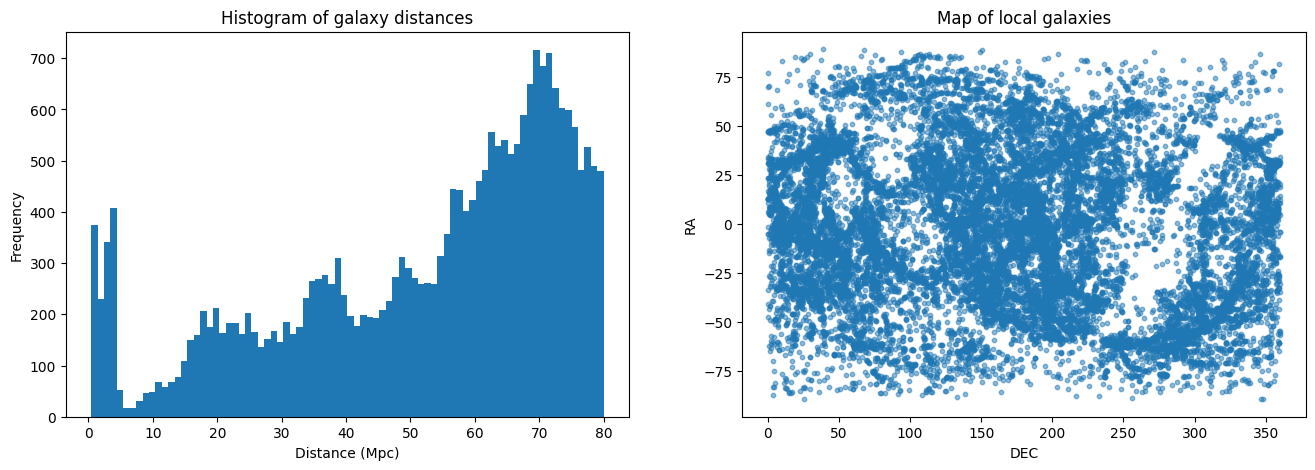

In [7]:
plt.figure(figsize=(16, 5))


plt.subplot(1, 2, 1)
plt.hist(df_local['D'], bins=80)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Frequency")
plt.title("Histogram of galaxy distances")

plt.subplot(1, 2, 2)
plt.scatter(df_local['RA'], df_local['DEC'], s=10, alpha=0.5)
plt.xlabel("DEC")
plt.ylabel("RA")
plt.title("Map of local galaxies")

plt.show()

# **2) From Stellar Mass to Halo Mass and Virial Radius**
### Tasks

- Implement a function `halo_mass_from_stellar_mass(logM_star)` with a chosen $\Delta$.
- Implement a function `rvir_from_mhalo(M_halo)` returning $R_{\mathrm{vir}}$ in kpc.
- Make a plot of $R_{\mathrm{vir}}$ vs. $M_{\mathrm{halo}}$ for your sample.  
We are using $$
M_{\mathrm{halo}} = k\, M_*
$$
and taking $\Delta$=1.7

In [8]:
delta=1.7
df_local['logM_halo']=df_local['logM_HEC'] + delta
#Rvir will be in kpc
df_local['R_vir']=250*(10**((df_local['logM_halo']-12)/3))

import math
df_local['RA']=df_local['RA']*math.pi/180
df_local['DEC']=df_local['DEC']*math.pi/180

df_local

,OBJNAME,RA,DEC,D,logM_HEC,logM_halo,R_vir
0,UGC12889,0.000121,0.825097,67.9204,11.0780,12.7780,454.227414
11,PGC000016,0.000822,-0.090038,77.7692,10.4119,12.1119,272.420640
13,PGC000018,0.000942,0.819695,76.7080,10.7069,12.4069,341.643641
27,UGC12893,0.002073,0.300550,18.1860,8.3695,10.0695,56.811991
31,ESO293-027,0.002144,-0.706587,40.8922,9.6905,11.3905,156.593360
...,...,...,...,...,...,...,...
203872,AGC322678,5.857529,0.621546,71.3084,9.6823,11.3823,155.610898
204035,AGC336325,6.040912,0.293084,73.5469,8.7175,10.4175,74.206169
204242,AGC336274,6.216412,0.329950,58.3648,9.2944,10.9944,115.542034
204288,AGC337093,6.263412,0.063365,73.3244,8.9753,10.6753,90.442663


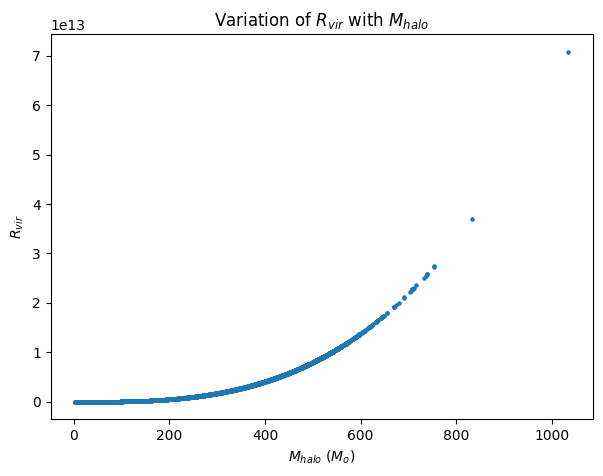

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(df_local['R_vir'], 10**df_local['logM_halo'], s=5)
plt.xlabel(r"$M_{halo}$ $(M_{o})$")
plt.ylabel(r"$R_{vir}$")
plt.title(r"Variation of $R_{vir}$ with $M_{halo}$")
plt.show()

# 3) Toy Halo DM Halo Profile
## Tasks

- Implement a function `dm_halo_impact(b, M_halo)` that returns  
  $\mathrm{DM}_{\mathrm{halo}}(b)$ in units of pc cm$^{-3}$.

$$
\mathrm{DM}_{\mathrm{halo}}(b)
=
\mathrm{DM}_0(M_{\mathrm{halo}})
\left( 1 + \frac{b}{r_s(M_{\mathrm{halo}})} \right)^{-\alpha}
\sqrt{ 1 - \left( \frac{b}{R_{\mathrm{vir}}} \right)^2 },
$$

for $b \le R_{\mathrm{vir}}$, and

$$
\mathrm{DM}_{\mathrm{halo}}(b) = 0
$$

otherwise.

Here, $r_s \approx 0.3\,R_{\mathrm{vir}}$ and

$$
\mathrm{DM}_0(M_{\mathrm{halo}}) \propto M_{\mathrm{halo}}^{1/3}.
$$
**Parameters we will use here are:** 

- $\alpha = 1.5$
- $r_s = 0.3\,R_{\mathrm{vir}}$
- $k = 0.035$
---
- Plot $\mathrm{DM}_{\mathrm{halo}}(b)$ as a function of $b$ for three halo masses,  
  e.g. $10^{11}$, $10^{12}$, $10^{13}\,M_\odot$.


In [10]:
import math
def dm_halo_impact(b, M_halo):          #has to give output in pc cm-3
  R_vir=250*(10**((math.log10(M_halo)-12)/3))
  a=1.5
  r_s=0.3*R_vir
  k=0.035                               #constant to be varied to bring dm0_M_halo to ~10 pc cm-3 for 10^12 M_halo
  dm0_M_halo=k*M_halo**(1/3)
  if(b>R_vir):
    return 0
  else:
    return dm0_M_halo*((1+b/(r_s*M_halo))**(-a))*((1-(b/R_vir)**0.5)**0.5)

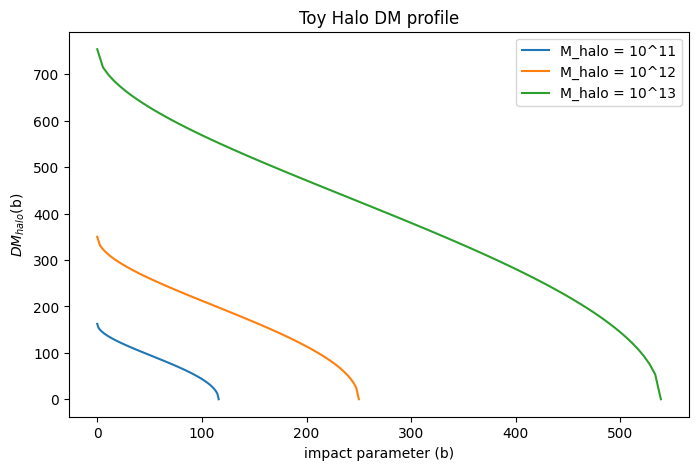

In [11]:
import numpy as np
M_halo_list=[10**11,10**12,10**13]
colors=['C0','C1','C2']

plt.figure(figsize=(8, 5))

for i, M_halo in enumerate(M_halo_list):
  R_vir=250*(10**((math.log10(M_halo)-12)/3))
  b=np.linspace(0,R_vir,100)
  y = np.array([dm_halo_impact(bi, M_halo) for bi in b])
  plt.plot(b, y, color=colors[i], label=f"M_halo = 10^{int(np.log10(M_halo))}")
plt.xlabel("impact parameter (b)")
plt.ylabel(r"$DM_{halo}$(b)")
plt.title("Toy Halo DM profile")
plt.legend()

plt.show()

# **4) Using HEALPix Circles to Find Intersected Pixels**
## Tasks

1. Convert the galaxy centre to a unit vector on the sphere using `healpy.ang2vec`.
2. Use `healpy.query_disc` with the centre direction and radius $\theta_{\mathrm{vir}}$ to obtain all pixel indices whose centres lie within this angular radius:  
pix_idx = healpy.query_disc(nside, vec, radius=theta_vir)
### For each of these pixels, you will:
- compute the angular separation $\theta$ between the pixel centre and the galaxy centre,
- compute the impact parameter $b = D\,\theta$,
- compute the path length $L(b)$
$$
L(b) = 2\sqrt{R_{\mathrm{vir}}^{2} - b^{2}}.
$$
- assign a halo DM contribution $\mathrm{DM}_{\mathrm{halo}}(b)$ to that pixel.

In [12]:
!pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 56.8 MB/s eta 0:00:00


In [13]:
import healpy as hp

Approximate resolution at NSIDE 256 is 0.23 deg
786432


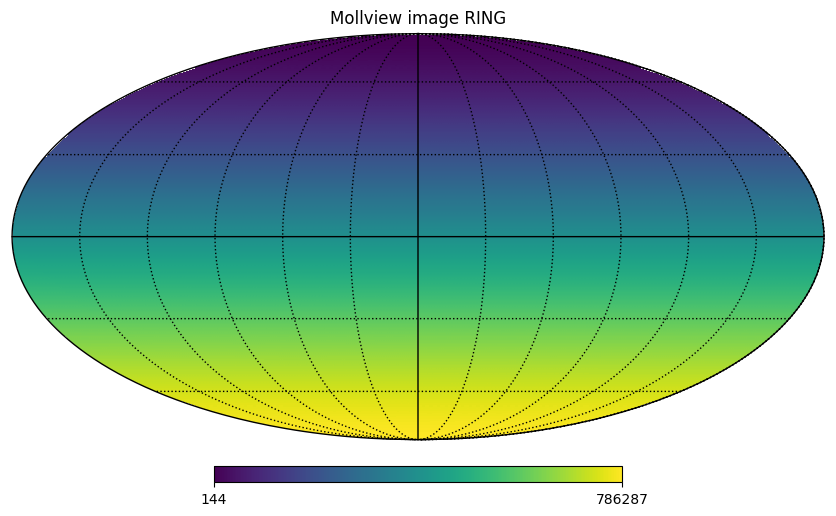

In [14]:
NSIDE = 256
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [15]:
vec=hp.ang2vec((math.pi/2)-df_local['DEC'], df_local['RA'])
df_local[['vx', 'vy', 'vz']]=vec
df_local['D']*=1000               #converted D to kpc
df_local

,OBJNAME,RA,DEC,D,logM_HEC,logM_halo,R_vir,vx,vy,vz
0,UGC12889,0.000121,0.825097,67920.4,11.0780,12.7780,454.227414,0.678486,0.000082,0.734614
11,PGC000016,0.000822,-0.090038,77769.2,10.4119,12.1119,272.420640,0.995949,0.000819,-0.089916
13,PGC000018,0.000942,0.819695,76708.0,10.7069,12.4069,341.643641,0.682444,0.000643,0.730938
27,UGC12893,0.002073,0.300550,18186.0,8.3695,10.0695,56.811991,0.955172,0.001980,0.296046
31,ESO293-027,0.002144,-0.706587,40892.2,9.6905,11.3905,156.593360,0.760581,0.001630,-0.649241
...,...,...,...,...,...,...,...,...,...,...
203872,AGC322678,5.857529,0.621546,71308.4,9.6823,11.3823,155.610898,0.740435,-0.335695,0.582292
204035,AGC336325,6.040912,0.293084,73546.9,8.7175,10.4175,74.206169,0.929398,-0.229680,0.288906
204242,AGC336274,6.216412,0.329950,58364.8,9.2944,10.9944,115.542034,0.943950,-0.063124,0.323995
204288,AGC337093,6.263412,0.063365,73324.4,8.9753,10.6753,90.442663,0.997798,-0.019732,0.063323


In [16]:
df_local['theta_vir']=df_local['R_vir']/df_local['D']
df_new=df_local.reset_index(drop=True)
df_new

,OBJNAME,RA,DEC,D,logM_HEC,logM_halo,R_vir,vx,vy,vz,theta_vir
0,UGC12889,0.000121,0.825097,67920.4,11.0780,12.7780,454.227414,0.678486,0.000082,0.734614,0.006688
1,PGC000016,0.000822,-0.090038,77769.2,10.4119,12.1119,272.420640,0.995949,0.000819,-0.089916,0.003503
2,PGC000018,0.000942,0.819695,76708.0,10.7069,12.4069,341.643641,0.682444,0.000643,0.730938,0.004454
3,UGC12893,0.002073,0.300550,18186.0,8.3695,10.0695,56.811991,0.955172,0.001980,0.296046,0.003124
4,ESO293-027,0.002144,-0.706587,40892.2,9.6905,11.3905,156.593360,0.760581,0.001630,-0.649241,0.003829
...,...,...,...,...,...,...,...,...,...,...,...
23924,AGC322678,5.857529,0.621546,71308.4,9.6823,11.3823,155.610898,0.740435,-0.335695,0.582292,0.002182
23925,AGC336325,6.040912,0.293084,73546.9,8.7175,10.4175,74.206169,0.929398,-0.229680,0.288906,0.001009
23926,AGC336274,6.216412,0.329950,58364.8,9.2944,10.9944,115.542034,0.943950,-0.063124,0.323995,0.001980
23927,AGC337093,6.263412,0.063365,73324.4,8.9753,10.6753,90.442663,0.997798,-0.019732,0.063323,0.001233


#### Example: Doing it for ith Galaxy

In [17]:
i=2

In [18]:
pix_indices = hp.query_disc(NSIDE, [df_new['vx'][i], df_new['vy'][i], df_new['vz'][i]], radius = df_new['theta_vir'][i])
print(f"Pixels corresponding to FRB sightlines that intersect the halo of {df_new['OBJNAME'][i]} are {pix_indices}")

Pixels corresponding to FRB sightlines that intersect the halo of PGC000018 are [104424 105340 106259 106260]


In [19]:
theta_pix, phi_pix = hp.pix2ang(NSIDE, pix_indices)
pix_ang = np.column_stack((theta_pix, phi_pix))
print(f"ang. coords. of these pixels are \n {pix_ang}")

ang. coords. of these pixels are 
 [[7.47675616e-01 3.42968630e-03]
 [7.51102839e-01 3.41477462e-03]
 [7.51102839e-01 6.27977053e+00]
 [7.54532379e-01 3.39999205e-03]]


In [20]:
print(f"For {df_new['OBJNAME'][i]}:")
for i in range(len(pix_indices)):
  theta, phi= pix_ang[i]
  vec_from_angles = hp.ang2vec(theta, phi)
  dot = np.dot(vec_from_angles, [df_new['vx'][i], df_new['vy'][i], df_new['vz'][i]])
  θ=math.acos(dot)
  b=θ*df_new['D'][i]
  if b<=df_new['R_vir'][i]:
    L=2*math.sqrt(df_new['R_vir'][i]**2-b**2)
    print(f"Pixel {pix_indices[i]}: θ={θ} radians, b={b} kpc, L={L} kpc, DM_halo(b)={dm_halo_impact(b, 10**df_new['logM_halo'][i])} pc cm-3")
  else:
    print(f"Pixel {pix_indices[i]}: θ={θ} radians, b={b} kpc, L=0 kpc, DM_halo(b)=0 pc cm-3")

For PGC000018:
Pixel 104424: θ=0.002992618043729298 radians, b=203.25981457731137 kpc, L=812.4235145131737 kpc, DM_halo(b)=365.8918934214693 pc cm-3
Pixel 105340: θ=0.9097338862358549 radians, b=70749.27654545345 kpc, L=0 kpc, DM_halo(b)=0 pc cm-3
Pixel 106259: θ=0.002973082470465546 radians, b=228.0592101444711 kpc, L=508.7607465486779 kpc, DM_halo(b)=204.5941710089089 pc cm-3
Pixel 106260: θ=0.5157147243455017 radians, b=9378.787976947295 kpc, L=0 kpc, DM_halo(b)=0 pc cm-3


# **5) Building the HEALPix DM Map (Hybrid Approach)**
Set nside = 256 and initialize a map:  
`dm_map = np.zeros(12 * nside * nside)`
### For each pixel:  
(a) Convert the pixel index back to $(\theta_{\mathrm{pix}}, \phi_{\mathrm{pix}})$ using `healpy.pix2ang`.  
(b) Compute the angular separation $\theta$ between the pixel centre and the galaxy direction (e.g. via the dot product of unit vectors).  
(c) Compute the impact parameter $b = D\,\theta$ (kpc).  
(d) If $b > R_{\mathrm{vir}}$, skip.  
(e) Otherwise, compute $\mathrm{DM}_{\mathrm{halo}}(b)$ using your `dm_halo_impact` function.  
(f) Add this value to `dm_map[pixel_index]`.
## Tasks

- Implement the above loop carefully and efficiently.  
- Produce a full–sky `mollview` plot of `dm_map` (e.g. using a logarithmic color scale).  
- Inspect the map for obvious “hot spots” corresponding to regions with many massive nearby galaxies.

In [21]:
NSIDE=256

In [22]:
dm_map_toy = np.zeros(12 * NSIDE * NSIDE)
for j in range(len(df_new)):
  pix_indices = hp.query_disc(NSIDE, [df_new['vx'][j], df_new['vy'][j], df_new['vz'][j]], radius = df_new['theta_vir'][j])
  theta_pix, phi_pix = hp.pix2ang(NSIDE, pix_indices)
  pix_ang = np.column_stack((theta_pix, phi_pix))
  for i in range(len(pix_indices)):
    theta, phi= pix_ang[i]
    vec_from_angles = hp.ang2vec(theta, phi)
    dot = np.dot(vec_from_angles, [df_new['vx'][j], df_new['vy'][j], df_new['vz'][j]])
    θ=math.acos(dot)
    b=θ*df_new['D'][j]
    dm_map_toy[pix_indices[i]]+=dm_halo_impact(b, 10**df_new['logM_halo'][j])
dm_map_toy

array([0., 0., 0., ..., 0., 0., 0.])

### **Interpretation of galaxies along FRB sightlines**
Galaxies in the local catalog are treated as foreground intervening halos intersecting FRB sightlines, and are not assumed to be FRB host galaxies. The total local-volume DM in a given direction is obtained by summing contributions from all halos intersecting that line of sight.

**"I have applied hist from of the map to enhance the details in the map below"**

<Figure size 1200x800 with 0 Axes>

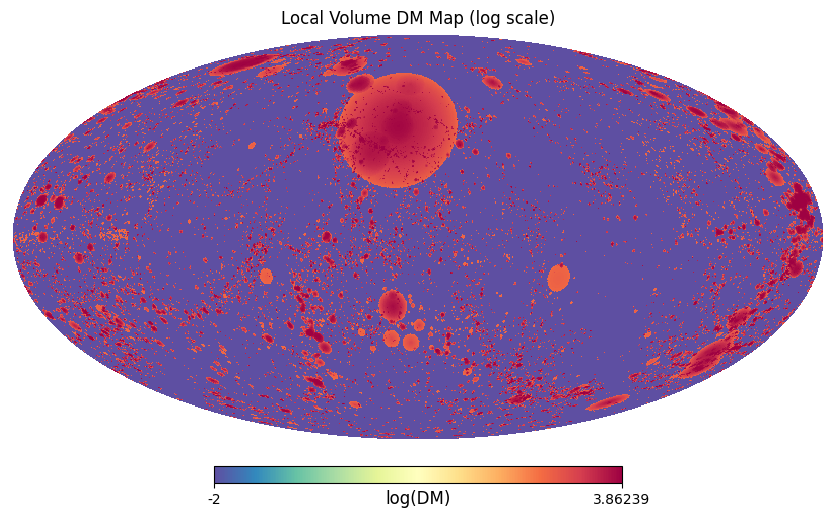

In [23]:
plt.figure(figsize=(12, 8))
k=10**(-2)
hp.mollview(np.log10(dm_map_toy + k),
            title="Local Volume DM Map (log scale)",
            unit="log(DM)",
            norm='hist',
            cmap='Spectral_r')


plt.show()

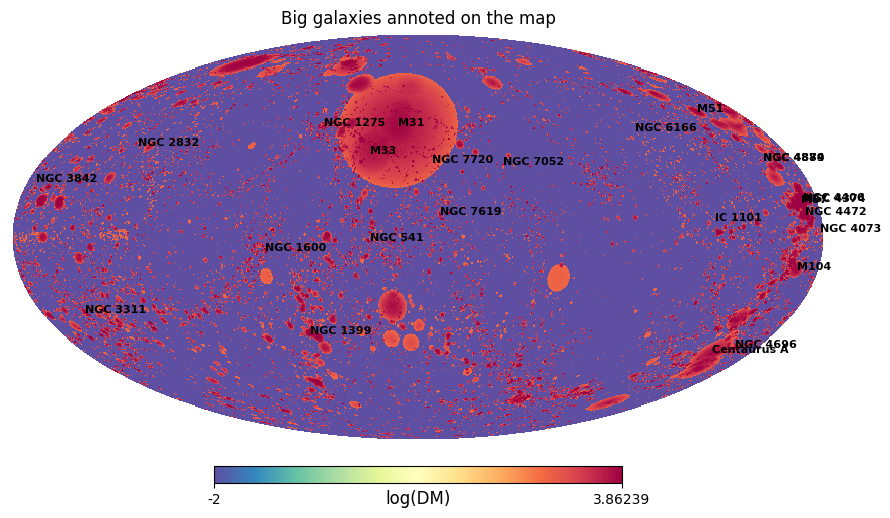

In [24]:
big_galaxies = {
     "NGC 4889":   (195.033,  27.977),
    "NGC 4874":   (194.896,  27.959),
    "NGC 6166":   (247.158,  39.551),
    "IC 1101":    (227.733,   5.745),
    "M87":        (187.705,  12.391),
    "NGC 3842":   (176.008,  19.950),
    "NGC 1275":   (49.950,   41.512),
    "NGC 4696":   (192.204, -41.311),
    "NGC 1600":   (67.917,   -5.086),
    "NGC 1399":   (54.621,  -35.450),
    "NGC 3311":   (159.178, -27.528),
    "NGC 7720":   (353.384,  27.019),
    "NGC 2832":   (139.353,  33.750),
    "NGC 4073":   (181.877,   1.896),
    "NGC 541":    (21.382,   -1.381),
    "NGC 7052":   (319.637,  26.447),
    "NGC 7619":   (350.061,   8.207),
    "NGC 4472":   (187.445,   8.000),
    "NGC 4374":   (186.266,  12.887),
    "NGC 4406":   (186.549,  12.946),
    "M31":        (10.684,  41.269),
    "M33":        (23.462,  30.660),
    "M104":       (189.997, -11.623),
    "Centaurus A": (201.365, -43.019),
    "M51":        (202.469,  47.195)
}
k=10**(-2)
hp.mollview(np.log10(dm_map_toy + k),
            title="Big galaxies annoted on the map",
            unit="log(DM)",
            norm='hist',
            cmap='Spectral_r')
for name, coords in big_galaxies.items():
    ra, dec = coords
    hp.projtext(ra, dec, name, fontsize=8, fontweight='bold', color='black', lonlat=True)

# **6) Seeing Maps for Realistic models (Optional task)**

- Implement a more realistic halo profile using `frb.halos.models.ModifiedNFW` for a subset of massive galaxies and compare the resulting DM map locally.  
  **I'm also adding a β model**

In [25]:
pip install git+https://github.com/FRBs/FRB.git

  Cloning https://github.com/FRBs/FRB.git to /tmp/pip-req-build-j28n6ups
  Running command git clone --filter=blob:none --quiet https://github.com/FRBs/FRB.git /tmp/pip-req-build-j28n6ups
  Resolved https://github.com/FRBs/FRB.git to commit 8eac255efa87b68acf9a21291b9621d0d7aea752
  Preparing metadata (setup.py) ... done
  Created wheel for FRB: filename=FRB-0.1.dev0-py3-none-any.whl size=99046473 sha256=98563ade73c682a2a3eb7091fb60e5605daaac7a9adcc6ecbbe431c895b890b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-64bsuvuu/wheels/8a/55/0f/6b17befead5d120a44a69045c3a754a52eb492339603cd7887
Successfully built FRB
Note: you may need to restart the kernel to use updated packages.


In [26]:
from frb.halos.models import ModifiedNFW
import astropy.units as u

## **Modified NFW DM halo profile**
**Electron density profile:**

$$
n_e(r) =
\frac{n_0}{(r/r_s)\,(1 + r/r_s)^2}
$$

with

$$
r_s = \frac{R_{\mathrm{vir}}}{c},
\qquad
c = 7.67 \left( \frac{M}{10^{12}} \right)^{-0.11}.
$$

**Normalization fixed by total gas mass:**

$$
\int_0^{R_{\mathrm{vir}}}
4\pi r^2\, n_e(r)\, dr
=
0.75 \times 0.157 \times \frac{M}{m_p}.
$$

**Projected dispersion measure at impact parameter $b$:**

$$
\mathrm{DM}(b)
=
2 \int_0^{\sqrt{R_{\mathrm{vir}}^2 - b^2}}
n_e\!\left( \sqrt{b^2 + \ell^2} \right)\, d\ell.
$$  
**Parameters we will use here are:**

- $\beta = 0.6$
- $r_c = 0.15\,R_{\mathrm{vir}}$
- $k = 0.035$

In [27]:
def dm_halo_nfw(b, M_halo):
    mnfw = ModifiedNFW(
        log_Mhalo=np.log10(M_halo),
        f_hot=0.3
    )

    b_kpc = b * u.kpc

    DM = mnfw.Ne_Rperp(b_kpc)   # already pc cm^-3

    return DM.value

## **Modified NFW DM model**

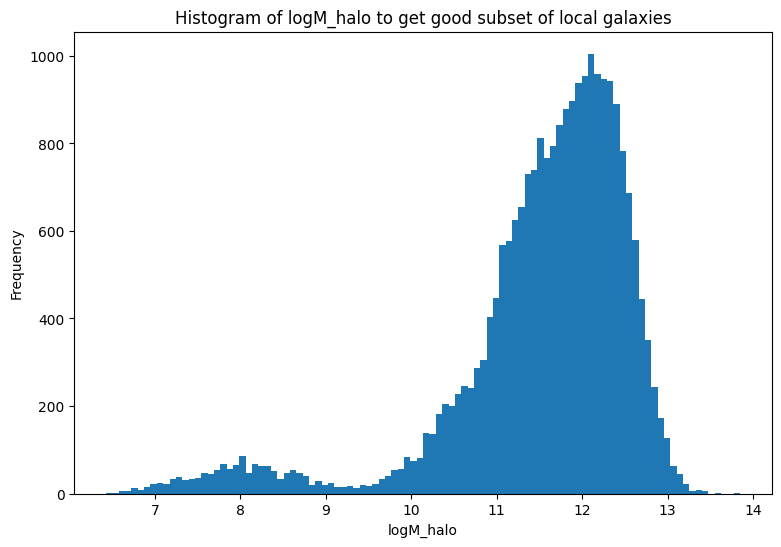

In [28]:
#histogram code to get a good subset
plt.figure(figsize=(9, 6))

plt.hist(df_new['logM_halo'], bins=100)
plt.xlabel("logM_halo")
plt.ylabel("Frequency")
plt.title("Histogram of logM_halo to get good subset of local galaxies")

plt.show()

In [29]:
df_massive = df_new[df_new['logM_halo'] >= 12.5].reset_index(drop=True)
dm_map_nfw = np.zeros(12 * NSIDE * NSIDE)

In [30]:
for j in range(len(df_massive)):
    mnfw = ModifiedNFW(
        log_Mhalo=df_massive['logM_halo'][j],
        f_hot=0.3
    )

    pix_indices = hp.query_disc(NSIDE, [df_massive['vx'][j], df_massive['vy'][j], df_massive['vz'][j]], radius=df_massive['theta_vir'][j])
    theta_pix, phi_pix = hp.pix2ang(NSIDE, pix_indices)

    for i, pix in enumerate(pix_indices):
        vec = hp.ang2vec(theta_pix[i], phi_pix[i])
        dot = np.dot(vec, [df_massive['vx'][j], df_massive['vy'][j], df_massive['vz'][j]])
        theta = math.acos(dot)
        b = theta * df_massive['D'][j]

        dm_map_nfw[pix] += mnfw.Ne_Rperp(b * u.kpc).value
dm_map_nfw

array([0., 0., 0., ..., 0., 0., 0.])

## **β DM halo profile**
**Electron density profile:**

$$
n_e(r) = n_0 \left( 1 + \frac{r^2}{r_c^2} \right)^{-3\beta/2}
$$

where:
- $n_0$ is the central electron density,
- $r_c$ is the core radius,
- $\beta$ controls the outer slope (typically $\beta \simeq 0.4$–$0.8$).

**Projected dispersion measure at impact parameter $b$:**

$$
\mathrm{DM}(b)
=
2 \int_0^{\sqrt{R_{\mathrm{vir}}^2 - b^2}}
n_e\!\left( \sqrt{b^2 + \ell^2} \right)\, d\ell
$$
**Parameters we will use here are:**

- $r_s = R_{\mathrm{vir}}/c$
- $f_{\mathrm{hot}} = 0.3$

In [31]:
def dm_halo_beta(b, M_halo):
    R_vir = 250 * (10**((math.log10(M_halo) - 12)/3))
    r_c   = 0.15 * R_vir
    beta  = 0.6
    k = 0.035
    dm0_M_halo = k * M_halo**(1/3)

    if b > R_vir:
        return 0
    else:
        return dm0_M_halo * (1 + (b/r_c)**2)**(0.5 - 1.5*beta) * (1 - (b/R_vir)**2)**0.5

## **β DM model**

In [32]:
dm_map_beta = np.zeros(12 * NSIDE * NSIDE)
for j in range(len(df_new)):
  pix_indices = hp.query_disc(NSIDE, [df_new['vx'][j], df_new['vy'][j], df_new['vz'][j]], radius = df_new['theta_vir'][j])
  theta_pix, phi_pix = hp.pix2ang(NSIDE, pix_indices)
  pix_ang = np.column_stack((theta_pix, phi_pix))
  for i in range(len(pix_indices)):
    theta, phi= pix_ang[i]
    vec_from_angles = hp.ang2vec(theta, phi)
    dot = np.dot(vec_from_angles, [df_new['vx'][j], df_new['vy'][j], df_new['vz'][j]])
    θ=math.acos(dot)
    b=θ*df_new['D'][j]
    dm_map_beta[pix_indices[i]]+=dm_halo_beta(b, 10**df_new['logM_halo'][j])
dm_map_beta

array([0., 0., 0., ..., 0., 0., 0.])

## **Comparing the DM profiles of Toy, Modifed NFW and β models**

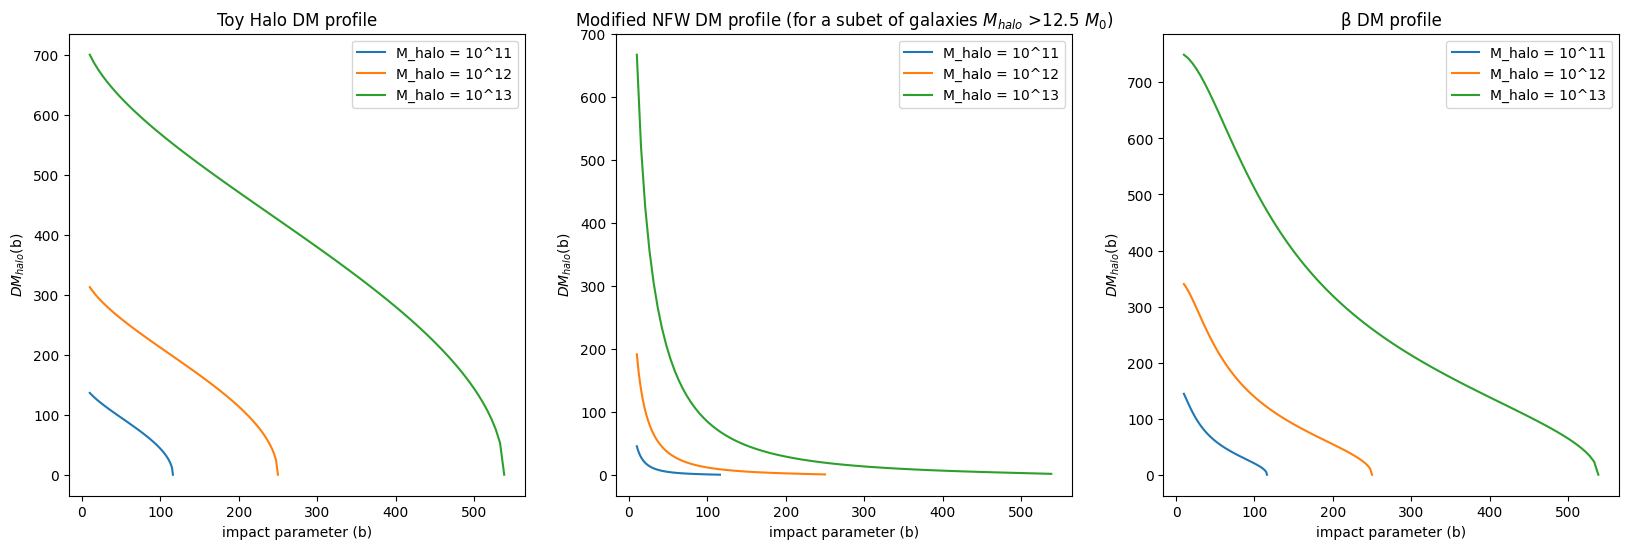

In [33]:
import numpy as np
M_halo_list=[10**11,10**12,10**13]
colors=['C0','C1','C2']

plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
for i, M_halo in enumerate(M_halo_list):
  R_vir=250*(10**((math.log10(M_halo)-12)/3))
  b=np.linspace(10,R_vir,100)
  y = np.array([dm_halo_impact(bi, M_halo) for bi in b])
  plt.plot(b, y, color=colors[i], label=f"M_halo = 10^{int(np.log10(M_halo))}")
plt.xlabel("impact parameter (b)")
plt.ylabel(r"$DM_{halo}$(b)")
plt.title("Toy Halo DM profile")
plt.legend()

plt.subplot(1,3,2)
for i, M_halo in enumerate(M_halo_list):
  R_vir=250*(10**((math.log10(M_halo)-12)/3))
  b=np.linspace(10,R_vir,100)
  y = np.array([dm_halo_nfw(bi, M_halo) for bi in b])
  plt.plot(b, y, color=colors[i], label=f"M_halo = 10^{int(np.log10(M_halo))}")
plt.xlabel("impact parameter (b)")
plt.ylabel(r"$DM_{halo}$(b)")
plt.title("Modified NFW DM profile (for a subet of galaxies $M_{halo}$ >12.5 $M_{0}$)")
plt.legend()

plt.subplot(1,3,3)
for i, M_halo in enumerate(M_halo_list):
  R_vir=250*(10**((math.log10(M_halo)-12)/3))
  b=np.linspace(10,R_vir,100)
  y = np.array([dm_halo_beta(bi, M_halo) for bi in b])
  plt.plot(b, y, color=colors[i], label=f"M_halo = 10^{int(np.log10(M_halo))}")
plt.xlabel("impact parameter (b)")
plt.ylabel(r"$DM_{halo}$(b)")
plt.title("β DM profile")
plt.legend()


plt.show()

## **Local Volume DM Map (log scale) Model-wise**

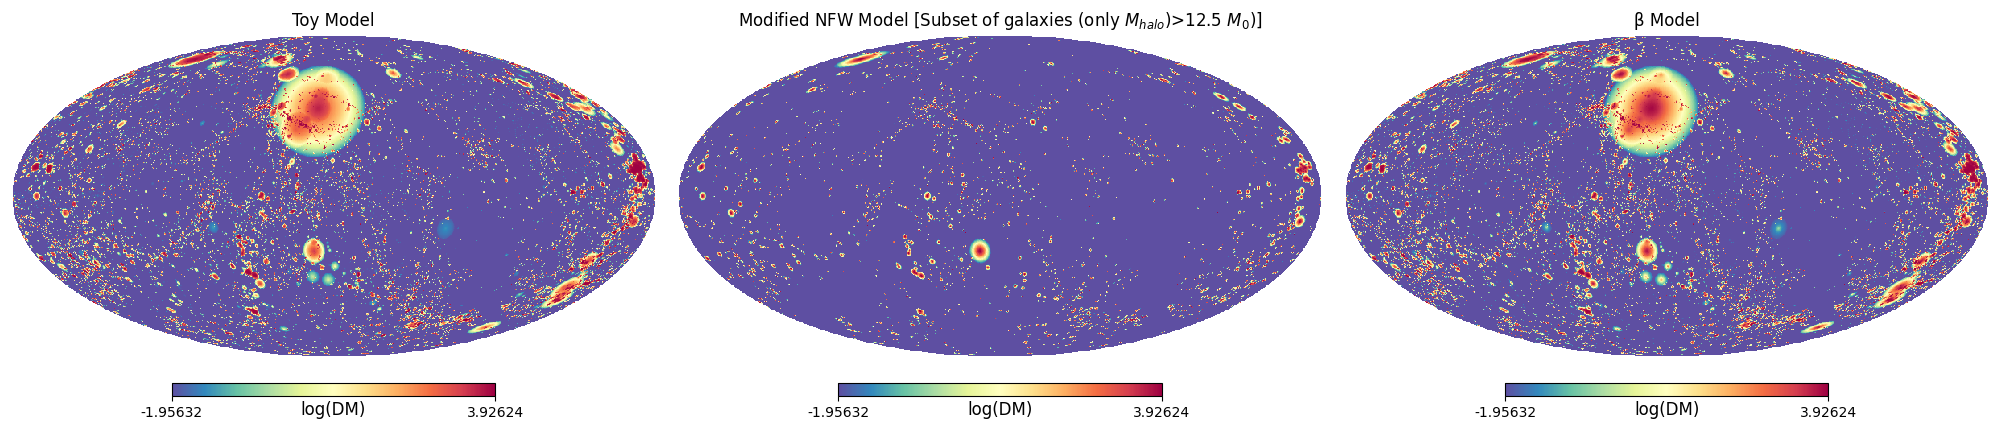

In [34]:
vmin = np.log10(
    np.min(
        np.concatenate([dm_map_toy[dm_map_toy > 0], dm_map_nfw[dm_map_nfw > 0], dm_map_beta[dm_map_beta > 0]])
    )
)
vmax = np.log10(
    np.max(
        np.concatenate([dm_map_toy, dm_map_nfw, dm_map_beta])
    )
)

plt.figure(figsize=(20, 5))

hp.mollview(np.log10(dm_map_toy + 1e-2), sub=(1,3,1), title="Toy Model", unit="log(DM)",
            cmap='Spectral_r', norm='hist', min=vmin, max=vmax)

hp.mollview(np.log10(dm_map_nfw + 1e-2), sub=(1,3,2), title="Modified NFW Model [Subset of galaxies (only $M_{halo})$>12.5 $M_{0}$)]", unit="log(DM)",
            cmap='Spectral_r', norm='hist', min=vmin, max=vmax)

hp.mollview(np.log10(dm_map_beta + 1e-2), sub=(1,3,3), title="β Model", unit="log(DM)",
            cmap='Spectral_r', norm='hist', min=vmin, max=vmax)

plt.show()

## **Seeing a clear difference between the maps with difference maps**

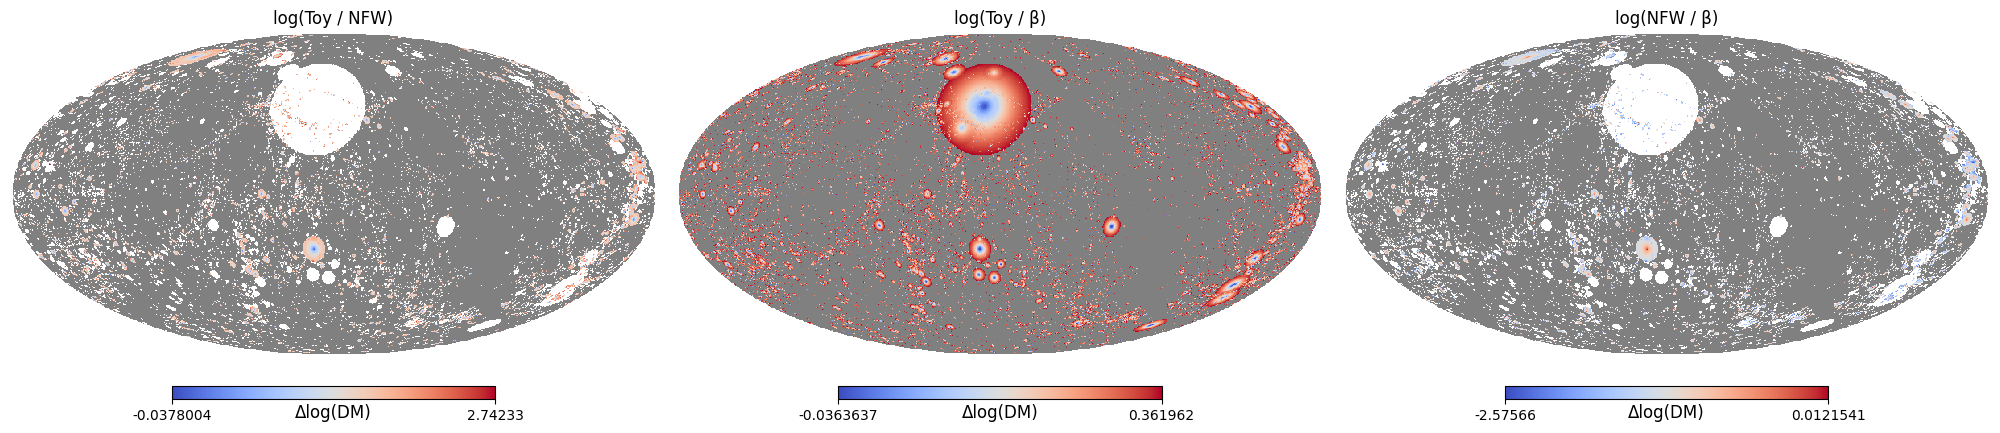

In [35]:
diff_toy_nfw  = np.log10((dm_map_toy) / (dm_map_nfw))
diff_toy_beta = np.log10((dm_map_toy) / (dm_map_beta))
diff_nfw_beta = np.log10((dm_map_nfw) / (dm_map_beta))

plt.figure(figsize=(20, 6))

hp.mollview(diff_toy_nfw,
            sub=(1, 3, 1),
            title="log(Toy / NFW)",
            cmap='coolwarm',
            unit="Δlog(DM)")

hp.mollview(diff_toy_beta,
            sub=(1, 3, 2),
            title="log(Toy / β)",
            cmap='coolwarm',
            unit="Δlog(DM)")

hp.mollview(diff_nfw_beta,
            sub=(1, 3, 3),
            title="log(NFW / β)",
            cmap='coolwarm',
            unit="Δlog(DM)")

plt.show()

# **7) Local–Volume DM Distribution Along FRB Sightlines (Optional task)**
- Add a simple FRB catalog (even a mock one) with random sightlines and sample `dm_map` at those positions to explore the distribution of local–volume DM.
  **(using CHIME FRB catalogue to extend it to a 5000 pixels biased mock catalogue)**

In [36]:
df_chime = pd.read_csv("/kaggle/input/chime-frb-catalogue/chimefrbcat1.csv")
df_chime.columns

Index(['tns_name', 'previous_name', 'repeater_name', 'ra', 'ra_err',
       'ra_notes', 'dec', 'dec_err', 'dec_notes', 'gl', 'gb', 'exp_up',
       'exp_up_err', 'exp_up_notes', 'exp_low', 'exp_low_err', 'exp_low_notes',
       'bonsai_snr', 'bonsai_dm', 'low_ft_68', 'up_ft_68', 'low_ft_95',
       'up_ft_95', 'snr_fitb', 'dm_fitb', 'dm_fitb_err', 'dm_exc_ne2001',
       'dm_exc_ymw16', 'bc_width', 'scat_time', 'scat_time_err', 'flux',
       'flux_err', 'flux_notes', 'fluence', 'fluence_err', 'fluence_notes',
       'sub_num', 'mjd_400', 'mjd_400_err', 'mjd_inf', 'mjd_inf_err',
       'width_fitb', 'width_fitb_err', 'sp_idx', 'sp_idx_err', 'sp_run',
       'sp_run_err', 'high_freq', 'low_freq', 'peak_freq', 'chi_sq', 'dof',
       'flag_frac', 'excluded_flag'],
      dtype='object')

In [37]:
cols_chime=['tns_name','ra','dec']
df_chime=df_chime[cols_chime]
df_chime.dropna()
df_chime

,tns_name,ra,dec
0,FRB20180725A,93.42,67.07
1,FRB20180727A,197.72,26.42
2,FRB20180729A,199.40,55.58
3,FRB20180729B,89.93,56.50
4,FRB20180730A,57.39,87.19
...,...,...,...
595,FRB20190701A,277.47,59.04
596,FRB20190701B,302.93,80.18
597,FRB20190701C,96.36,81.63
598,FRB20190701D,112.10,66.70


In [38]:
ra_chime  = df_chime['ra'].values
dec_chime = df_chime['dec'].values
theta_chime = np.radians(90.0 - dec_chime)
phi_chime   = np.radians(ra_chime)

pix_chime = hp.ang2pix(NSIDE, theta_chime, phi_chime)

npix = hp.nside2npix(NSIDE)

In [39]:
counts = np.bincount(pix_chime, minlength=npix)

epsilon = 0.05   # % uniform sky contribution
counts_smooth = counts + epsilon * counts.mean()

prob = counts_smooth / counts_smooth.sum()
prob

array([6.05507502e-08, 6.05507502e-08, 6.05507502e-08, ...,
       6.05507502e-08, 6.05507502e-08, 6.05507502e-08])

In [40]:
N_mock = 5000

np.random.seed(69)
frb_pix_mock = np.random.choice(
    np.arange(npix),
    size=N_mock,
    p=prob
)
frb_pix_mock

array([ 34627, 249405,  37530, ..., 182478, 221847,  34627])

In [41]:
dm_map_toy_frb_mock=dm_map_toy[frb_pix_mock]
dm_map_nfw_frb_mock=dm_map_nfw[frb_pix_mock]
dm_map_beta_frb_mock=dm_map_beta[frb_pix_mock]

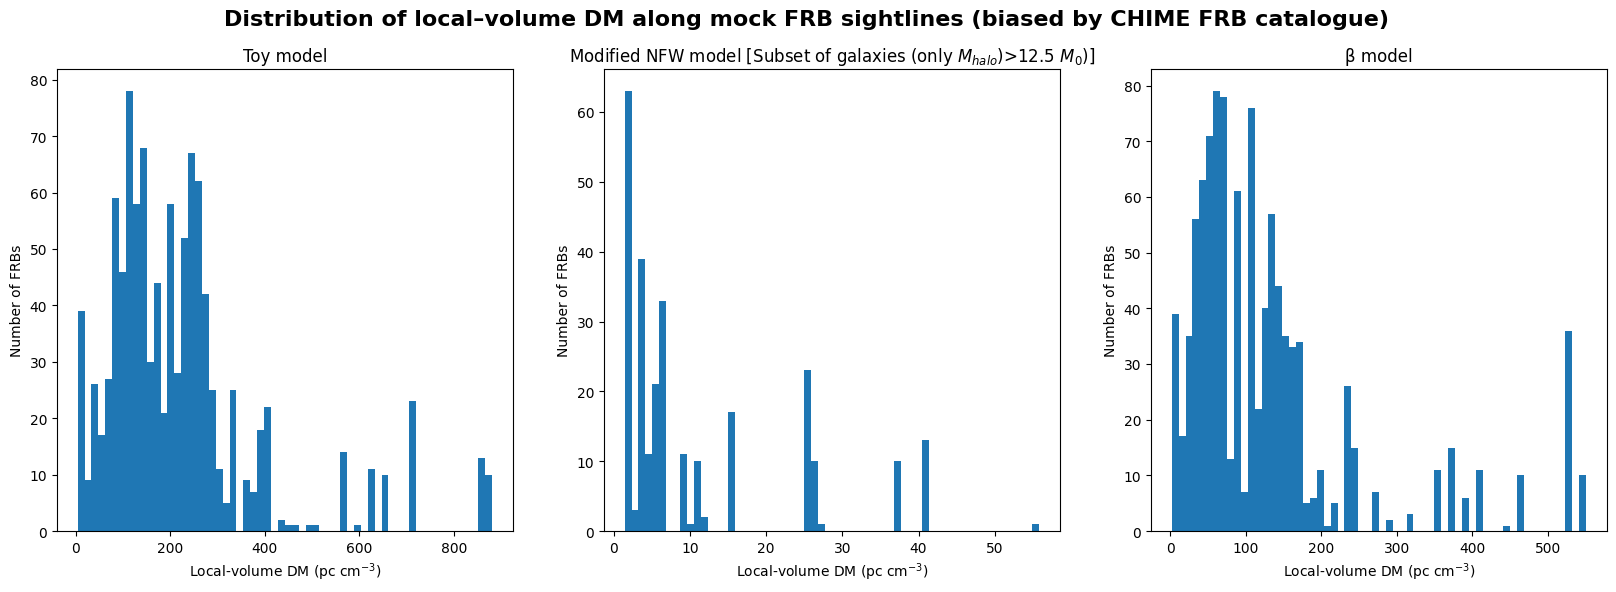

In [42]:
plt.figure(figsize=(20,6))
plt.suptitle("Distribution of local–volume DM along mock FRB sightlines (biased by CHIME FRB catalogue)", fontsize=16, fontweight="bold")

plt.subplot(1,3,1)
dm_nonzero_toy = dm_map_toy_frb_mock[dm_map_toy_frb_mock > 0]
plt.hist(dm_nonzero_toy, bins=60)
plt.title("Toy model")
plt.xlabel("Local-volume DM (pc cm$^{-3}$)")
plt.ylabel("Number of FRBs")

plt.subplot(1,3,2)
dm_nonzero_nfw = dm_map_nfw_frb_mock[dm_map_nfw_frb_mock > 0]
plt.hist(dm_nonzero_nfw, bins=60)
plt.title("Modified NFW model [Subset of galaxies (only $M_{halo})$>12.5 $M_{0}$)]")
plt.xlabel("Local-volume DM (pc cm$^{-3}$)")
plt.ylabel("Number of FRBs")

plt.subplot(1,3,3)
dm_nonzero_beta = dm_map_beta_frb_mock[dm_map_beta_frb_mock > 0]
plt.hist(dm_nonzero_beta, bins=60)
plt.title("β model")
plt.xlabel("Local-volume DM (pc cm$^{-3}$)")
plt.ylabel("Number of FRBs")

plt.show()

# **Comprehension questions**
## 1. Why is it reasonable (to first order) to use stellar mass as a proxy for halo mass?  
### **Ans:**  

To first order, stellar mass is taken proportional to halo mass:

$M_* = f_*\, f_b\, M_{\mathrm{halo}}$

where,  
- $f_*$ : star formation efficiency  
- $f_b$ : cosmic baryon fraction  

Taking log on both sides, gives:  
$\log M_{\mathrm{halo}} = \log M_* + \Delta$ with $\Delta = -\log (f_* f_b)$.  

For a typical halo of $M_{\mathrm{halo}} \sim 10^{12}\, M_\odot$, with $f_b \approx 0.16$ and $f_* \approx 0.05$, we have $f_* f_b \sim 1$–$2\% \Rightarrow \Delta \approx 1.7$–$2.1$.

Thus, only a few percent of the total halo mass is converted into stars, and this first-order linear relation captures the dominant scaling between stellar mass and halo mass while neglecting smaller nonlinear effects.  

## 2. What are some limitations of using a local catalog like HECATE for modeling the DM from large–scale structure?  
###**Ans:**  
The catalog contains only galaxies, missing the diffuse intergalactic medium (IGM) that holds a large fraction of cosmic baryons. Simulations show that about 30–50% of all baryons reside in the warm–hot intergalactic medium, contributing significantly to the FRB dispersion measure. Hence, such a catalog captures only the halo component of

$$
\mathrm{DM}_{\mathrm{LSS}} = \int n_{e,\mathrm{halo}}\, dl + \int n_{e,\mathrm{IGM}}\, dl ,
$$

while neglecting the continuous IGM term, leading to an underestimate of the total DM.

It also relies on a simplified stellar-to-halo mass conversion, typically

$$
\log M_{\mathrm{halo}} = \log M_* + \Delta ,
$$

which ignores the curvature and intrinsic scatter in the true stellar–halo mass relation. The resulting errors propagate to halo radii, since

$$
R_{\mathrm{vir}} \propto M_{\mathrm{halo}}^{1/3} ,
$$

and therefore to the estimated DM contribution from each halo.

Finally, HECATE’s limited volume coverage (≲ 200 Mpc, or $z \sim 0.047$) excludes most of the large-scale cosmic web traversed by FRB sightlines. Restricting the modeled volume to this small region misses the majority of the electron column density, making the modeled DM only a small fraction of the true cosmic value.
## 3. How sensitive is R_vir to your choice of ∆? What changes if you used a different offset?  
### **Ans:**  
The virial radius depends on the offset $\Delta$ through the halo mass relation

$$
\log M_{\mathrm{halo}} = \log M_* + \Delta ,
\qquad
R_{\mathrm{vir}} \propto M_{\mathrm{halo}}^{1/3} .
$$

Hence, $R_{\mathrm{vir}} \propto 10^{\Delta/3}$, meaning that increasing $\Delta$ by 1 increases $R_{\mathrm{vir}}$ by a factor of $\sim 2.2$. Even a small change, e.g. $\Delta = 1.7$ to $2.0$, increases $R_{\mathrm{vir}}$ by roughly 25–30%.

Larger $\Delta$ values imply more massive halos and longer path lengths through them, directly boosting the integrated halo DM since

$$
\mathrm{DM}_{\mathrm{halo}} \propto n_e\, L(b) ,
$$

and $L(b)$ scales with halo size. Therefore, increasing $\Delta$ increases both the spatial extent and the DM contribution of each halo.

Physically, a higher $\Delta$ corresponds to assigning a more massive halo to the same stellar mass, implying a lower star-formation efficiency $f_*$. A smaller $\Delta$ instead represents more efficient star formation and more compact halos.
## 4. How does the DM profile change with halo mass in your model?  
###**Ans:**  
The halo DM profile in the model is given by

$$
\mathrm{DM}_{\mathrm{halo}}(b)
=
\mathrm{DM}_0(M_{\mathrm{halo}})
\left( 1 + \frac{b}{r_s(M_{\mathrm{halo}})} \right)^{-\alpha}
\sqrt{ 1 - \left( \frac{b}{R_{\mathrm{vir}}} \right)^2 } ,
$$

where $r_s \approx 0.3\,R_{\mathrm{vir}}$, $\mathrm{DM}_0 \propto M_{\mathrm{halo}}^{1/3}$, and $\alpha \approx 1.5$.

The normalization $\mathrm{DM}_0$ increases with halo mass as $M_{\mathrm{halo}}^{1/3}$, so more massive halos have higher central DM values. A tenfold increase in $M_{\mathrm{halo}}$ raises the central DM by a factor of $\sim 2.15$.

Since $R_{\mathrm{vir}} \propto M_{\mathrm{halo}}^{1/3}$ and $r_s = 0.3\,R_{\mathrm{vir}}$, both the size and radial extent of the profile increase with halo mass, causing higher-mass halos to contribute DM over larger impact parameters $b$.

The overall profile therefore becomes broader and more extended for massive halos, while smaller halos show steeper declines with $b$.
## 5. What physical assumptions are hidden in your choices of DM0, rs, and α?  
### **Ans:**  
The normalization $\mathrm{DM}_0(M_{\mathrm{halo}}) \propto M_{\mathrm{halo}}^{1/3}$ assumes that halos have a roughly constant baryon fraction and similar ionization levels, with gas in hydrostatic equilibrium tracing the dark-matter potential. More massive halos therefore contain proportionally denser and more ionized gas, giving higher central DM values while preserving overall structural similarity.

Setting $r_s \approx 0.3\,R_{\mathrm{vir}}$ assumes a self-similar gas distribution in which all halos share the same relative concentration, independent of mass. This implies that the gas density declines significantly beyond roughly one-third of the virial radius, representing a typical extent of the circumgalactic medium.

Choosing $\alpha = 1.5$ corresponds to a moderately steep density fall-off, consistent with hydrostatic gas in NFW-like halos, and provides a balance between strong central concentration and extended halo gas.
## 6. How does the DM sky vary across the sky? Do you see regions dominated by a few nearby massive structures?  
### **Ans:**  
The DM sky is highly anisotropic, varying strongly with direction due to the clustered and non-uniform distribution of galaxies and halos within the local volume.

Regions between large-scale structures exhibit very low DM, while directions toward dense environments appear much brighter, indicating strong contrast between voids and galaxy-rich areas.

A few nearby massive systems, such as M31 and NGC 1275, dominate the map, as their large halos contribute disproportionately to the total DM.

Overlapping halos in superclusters like Virgo and Perseus–Pisces produce extended high-DM patches, making the sky map appear patchy rather than smooth.
## 7. How does the map change if you vary nside or the normalization of your DM profile?  
### **Ans:**  
Increasing $n_{\mathrm{side}}$ improves angular resolution since $N_{\mathrm{pix}} = 12\,n_{\mathrm{side}}^2$. Smaller pixels reveal finer halo structures and sharper high-DM boundaries, while lower values smooth out small-scale variations and blend nearby halos into broader patches.

Changing the normalization $\mathrm{DM}_0$ rescales the amplitude of all halo profiles, uniformly brightening or dimming the map without altering the relative structure. Higher $\mathrm{DM}_0$ values make all regions brighter, reflecting a higher assumed electron density or baryon fraction in halos.

Together, $n_{\mathrm{side}}$ controls spatial detail, while $\mathrm{DM}_0$ sets the overall intensity. Adjusting either changes the map’s appearance but not which regions are dominated by massive halos.

# **Conculsion**
### **What I learned?**  
While working on this capstone project, I learned how to construct a physical model that connects galaxy halo properties to their contribution to the dispersion measure (DM) of fast radio bursts. Developing the halo DM profile helped me understand how the baryon fraction, gas density structure, and virial scaling laws determine the radial distribution of free electrons around galaxies. I also learned to implement this theory computationally using HEALPix to map DM contributions across the entire sky, which showed how discrete halos combine to form large-scale anisotropic DM patterns. This integration of physical modeling with spherical data visualization gave me a clearer view of how local structures shape observable patterns.
### **What I found challenging?**  
The ModifiedNFW model from the frb.halos.models gives output around 7000units for halo distibution for lower impact paramter b. So, I had to scale the f_hot down along with up-scaling the toy model and the β model. The entire concept of HEALPix and the *healpy* library was completely new to me, and learning its functions and syntax took some time. Despite this, it was genuinely enjoyable to work with, especially when generating visual sky maps and fine-tuning their color schemes to highlight different structures.

Running the code locally often led to RAM limitations, so I used Colab or Kaggle notebooks instead, which required re-uploading the galaxy catalog each time I reopened the notebook. I also found that setting $n_{\mathrm{side}} = 1024$ resulted in extremely long runtimes, so I primarily experimented with values up to $512$ to balance spatial detail and computational cost.
### **What I try next time with more time?**  
With more time, I would extend the model beyond 200 Mpc using the **Sloan Digital Sky Survey (SDSS)**, which reaches distances of order 1 Gpc and provides reliable redshifts and stellar masses for millions of galaxies. This would allow the DM map to represent the large-scale cosmic web more accurately and capture contributions from distant structures.

I would also refine the halo gas profiles and explicitly include the diffuse intergalactic medium, then compare the extended DM predictions against observed FRB dispersion measures to assess how well the model matches real data.